In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import collections
import random
import math
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 50
plt.rcParams["figure.figsize"] = (30,15)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)

**Data for Training and Testing**

In [3]:
training_set =pd.read_csv("train.csv")
testing_set=pd.read_csv("test.csv")
testing_labels=pd.read_csv("submit.csv")
testing_set=pd.merge(testing_set, testing_labels)

**Pre-Processing**

In [4]:
def replace_unwanted_characters(word):
    return "".join([char for char in word if char.isalpha()]).lower()
def text_cleaning(text):        
    return [word for word in [replace_unwanted_characters(word) for word in str(text).split(" ")] if word!='']
def author_cleaning(text):
    return [" ".join([word for word in [replace_unwanted_characters(word) for word in text.split(" ")] if word!=''])]


In [5]:
training_set["text"]=list(map(text_cleaning,training_set["text"]))
training_set["title"] = training_set["title"].replace(np.nan, "no_title")
training_set["title"]=list(map(text_cleaning,training_set["title"]))
training_set["author"] = training_set["author"].replace(np.nan, "no_author")
training_set["author"]=list(map(author_cleaning,training_set["author"]))

**Data Visualization**

In [6]:
def swap_keys_with_values(dictionary):
    new_dictionary={}
    for key,value in dictionary.items():
        new_dictionary[value]=key
    return new_dictionary

def top_k_most_frequent_words(dictionary,k):
    most_frequent_words={}
    if k>len(dictionary):
        print("There are less than {} in the dictionary, pick a number less than or equal to {}".format(k,len(dictionary)))
        return 
    for key in sorted(list(dictionary.keys()))[-k:]:
        most_frequent_words[dictionary[key]]=key
    return most_frequent_words

def unique_words_between_two_dictionaries(dictionary_1,dictionary_2,output_common_words=False):
    common_words=[word for word in dictionary_1.keys() if word in dictionary_2.keys()]
    for word in common_words:
        del dictionary_1[word]
        del dictionary_2[word]
    if output_common_words==True:
        return common_words,dictionary_1,dictionary_2
    return dictionary_1,dictionary_2

def count_frequency_of_words_per_feature(dataframe,feature):
    reliable_feature_word_count,unreliable_feature_word_count={},{}
    for i in range(len(dataframe)):
        if dataframe["label"][i]==0:
            for word in dataframe[feature][i]:
                if word not in reliable_feature_word_count:
                    reliable_feature_word_count[word]=1
                else:
                    reliable_feature_word_count[word]+=1
        else:
            for word in dataframe[feature][i]:
                if word not in unreliable_feature_word_count:
                    unreliable_feature_word_count[word]=1
                else:
                    unreliable_feature_word_count[word]+=1
    return reliable_feature_word_count,unreliable_feature_word_count

def create_visualization_of_top_words(dictionary,feature,common=False,reliable=False):
    df = pd.DataFrame(data=[i for i in list(dictionary.values())[::-1]],columns=["Words"], index = [word for word in list(dictionary.keys())[::-1]])
    df.plot.barh()
    if feature=="author" and reliable==True:
        plt.title('Top {} reliable news authors'.format(len(df),feature))
        plt.ylabel('Authors')
        plt.xlabel('Number of reliable articles written')
        plt.show()
        return
    if feature=="author" and reliable==False:
        plt.title('Top {} unreliable news authors'.format(len(df),feature))
        plt.ylabel('Authors')
        plt.xlabel('Number of reliable articles written')
        plt.show()
        return
    if common==True:
        plt.title('Top {} common words between unreliable and reliable news {}'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    if reliable==True:
        plt.title('Top {} common words unique to reliable news {}s'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    if reliable==False:
        plt.title('Top {} common words unique to unreliable news {}s'.format(len(df),feature))
        plt.ylabel('Words')
        plt.xlabel('Frequency')
        plt.show()
        return
    

In [7]:
Reliable_articles_texts,Unreliable_articles_texts=count_frequency_of_words_per_feature(training_set,'text')

Reliable_articles_texts=swap_keys_with_values(Reliable_articles_texts)
Unreliable_articles_texts=swap_keys_with_values(Unreliable_articles_texts)

common_words,unique_reliable_words,unique_unreliable_words=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_texts,240),top_k_most_frequent_words(Unreliable_articles_texts,240),output_common_words=True)

In [8]:
Reliable_articles_authors,Unreliable_articles_authors=count_frequency_of_words_per_feature(training_set,"author")

Reliable_articles_authors=swap_keys_with_values(Reliable_articles_authors)
Unreliable_articles_authors=swap_keys_with_values(Unreliable_articles_authors)

common_authors,unique_reliable_authors,unique_unreliable_authors=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_authors,50),top_k_most_frequent_words(Unreliable_articles_authors,50),output_common_words=True)

In [9]:
Reliable_articles_titles,Unreliable_articles_titles=count_frequency_of_words_per_feature(training_set,"title")

Reliable_articles_titles=swap_keys_with_values(Reliable_articles_titles)
Unreliable_articles_titles=swap_keys_with_values(Unreliable_articles_titles)

common_titles,unique_reliable_titles,unique_unreliable_titles=unique_words_between_two_dictionaries(top_k_most_frequent_words(Reliable_articles_titles,77),top_k_most_frequent_words(Unreliable_articles_titles,77),output_common_words=True)

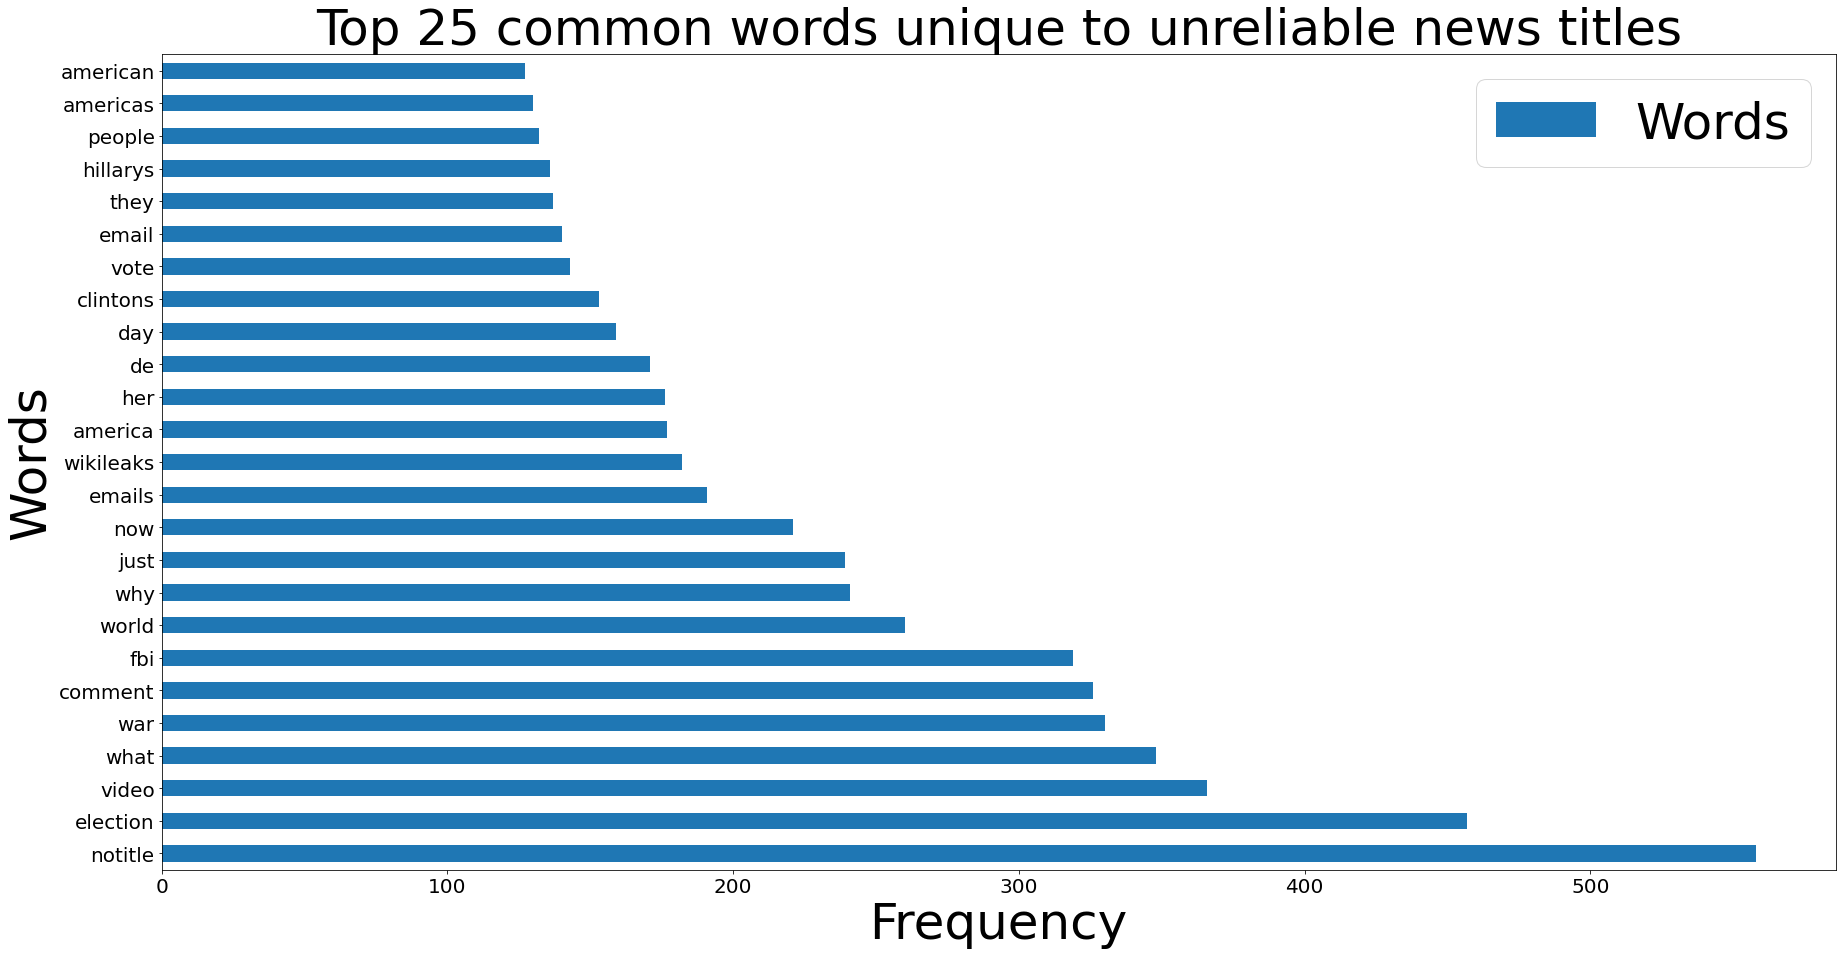

In [10]:
create_visualization_of_top_words(unique_unreliable_titles,"title",common=False,reliable=False)


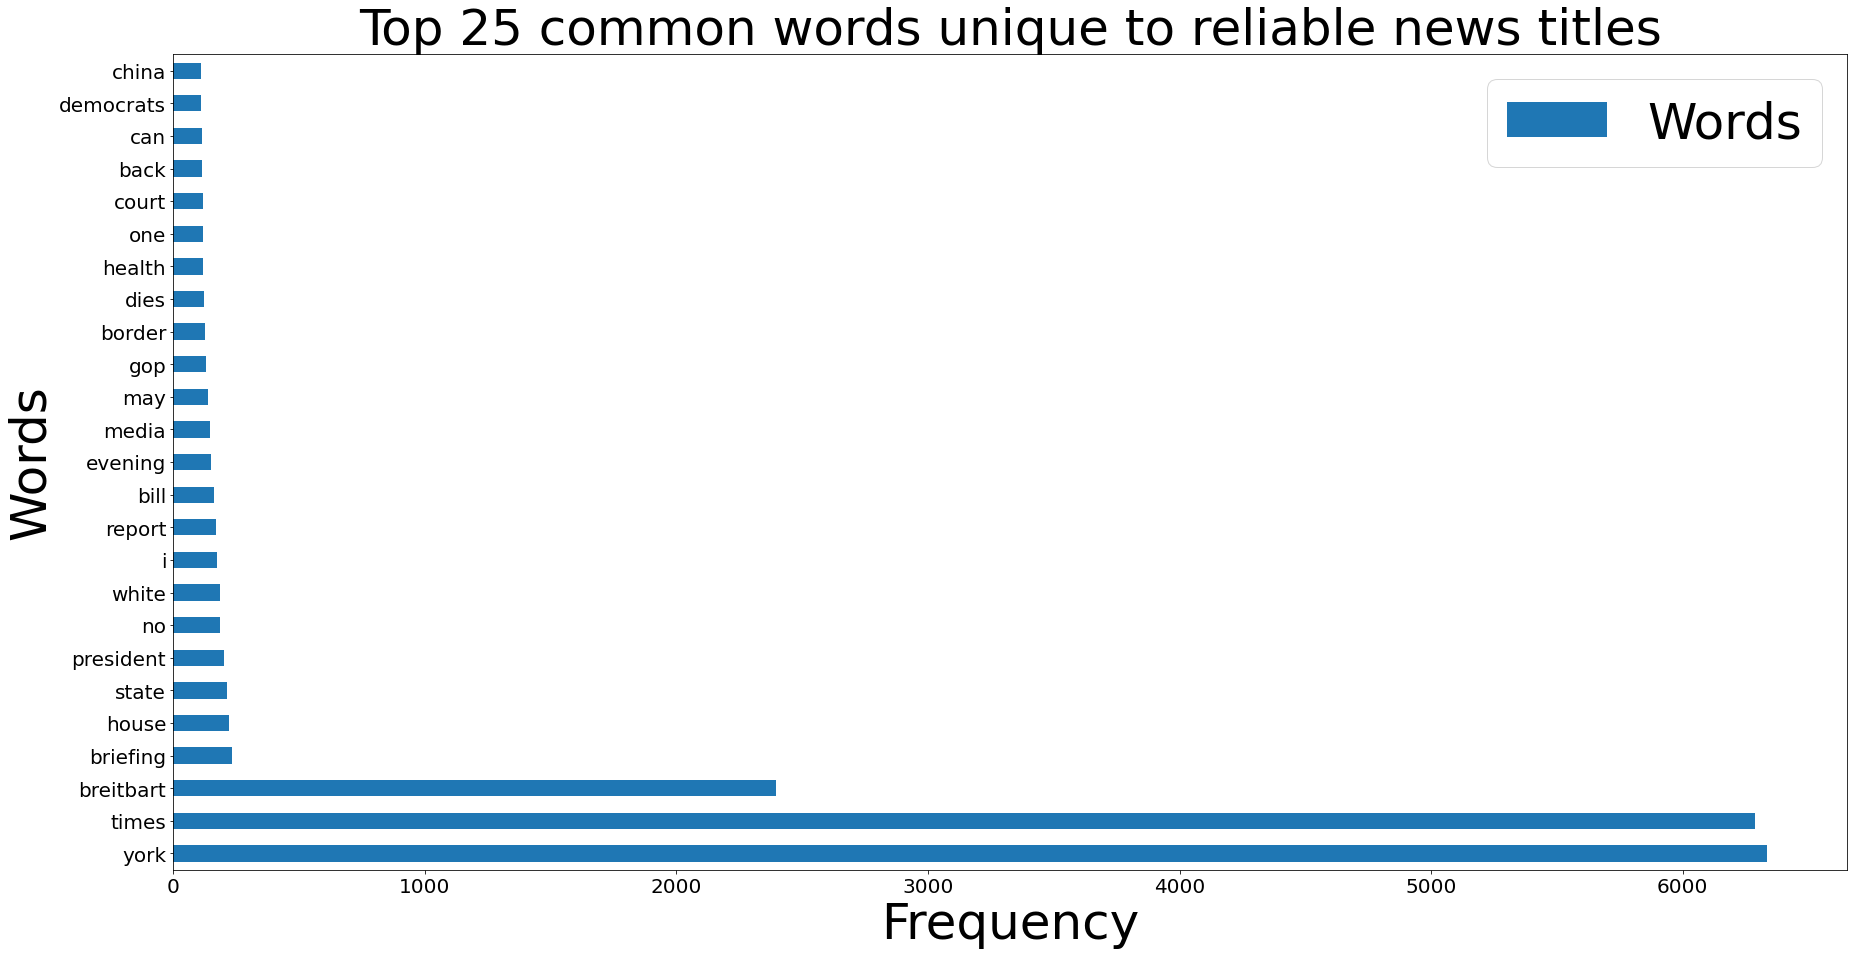

In [11]:
create_visualization_of_top_words(unique_reliable_titles,"title",common=False,reliable=True)

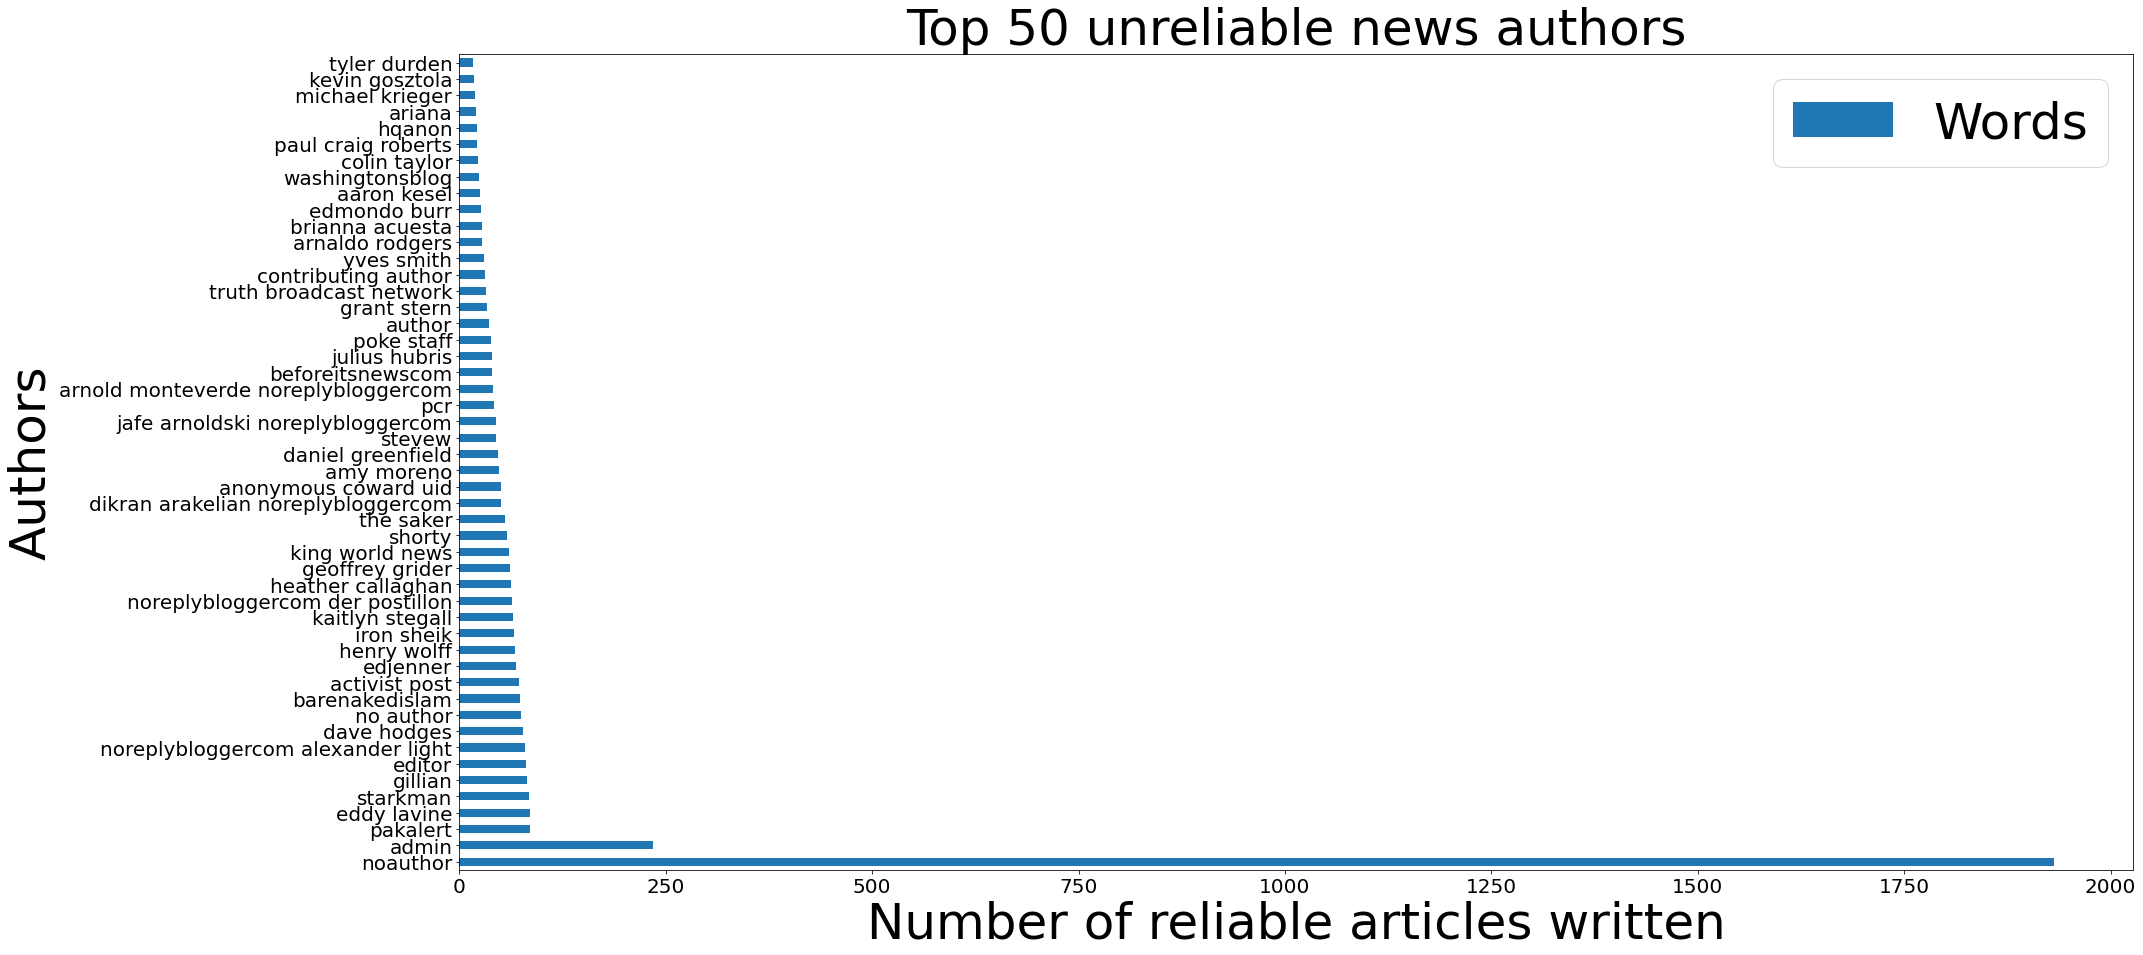

In [12]:
create_visualization_of_top_words(unique_unreliable_authors,"author",common=False,reliable=False)

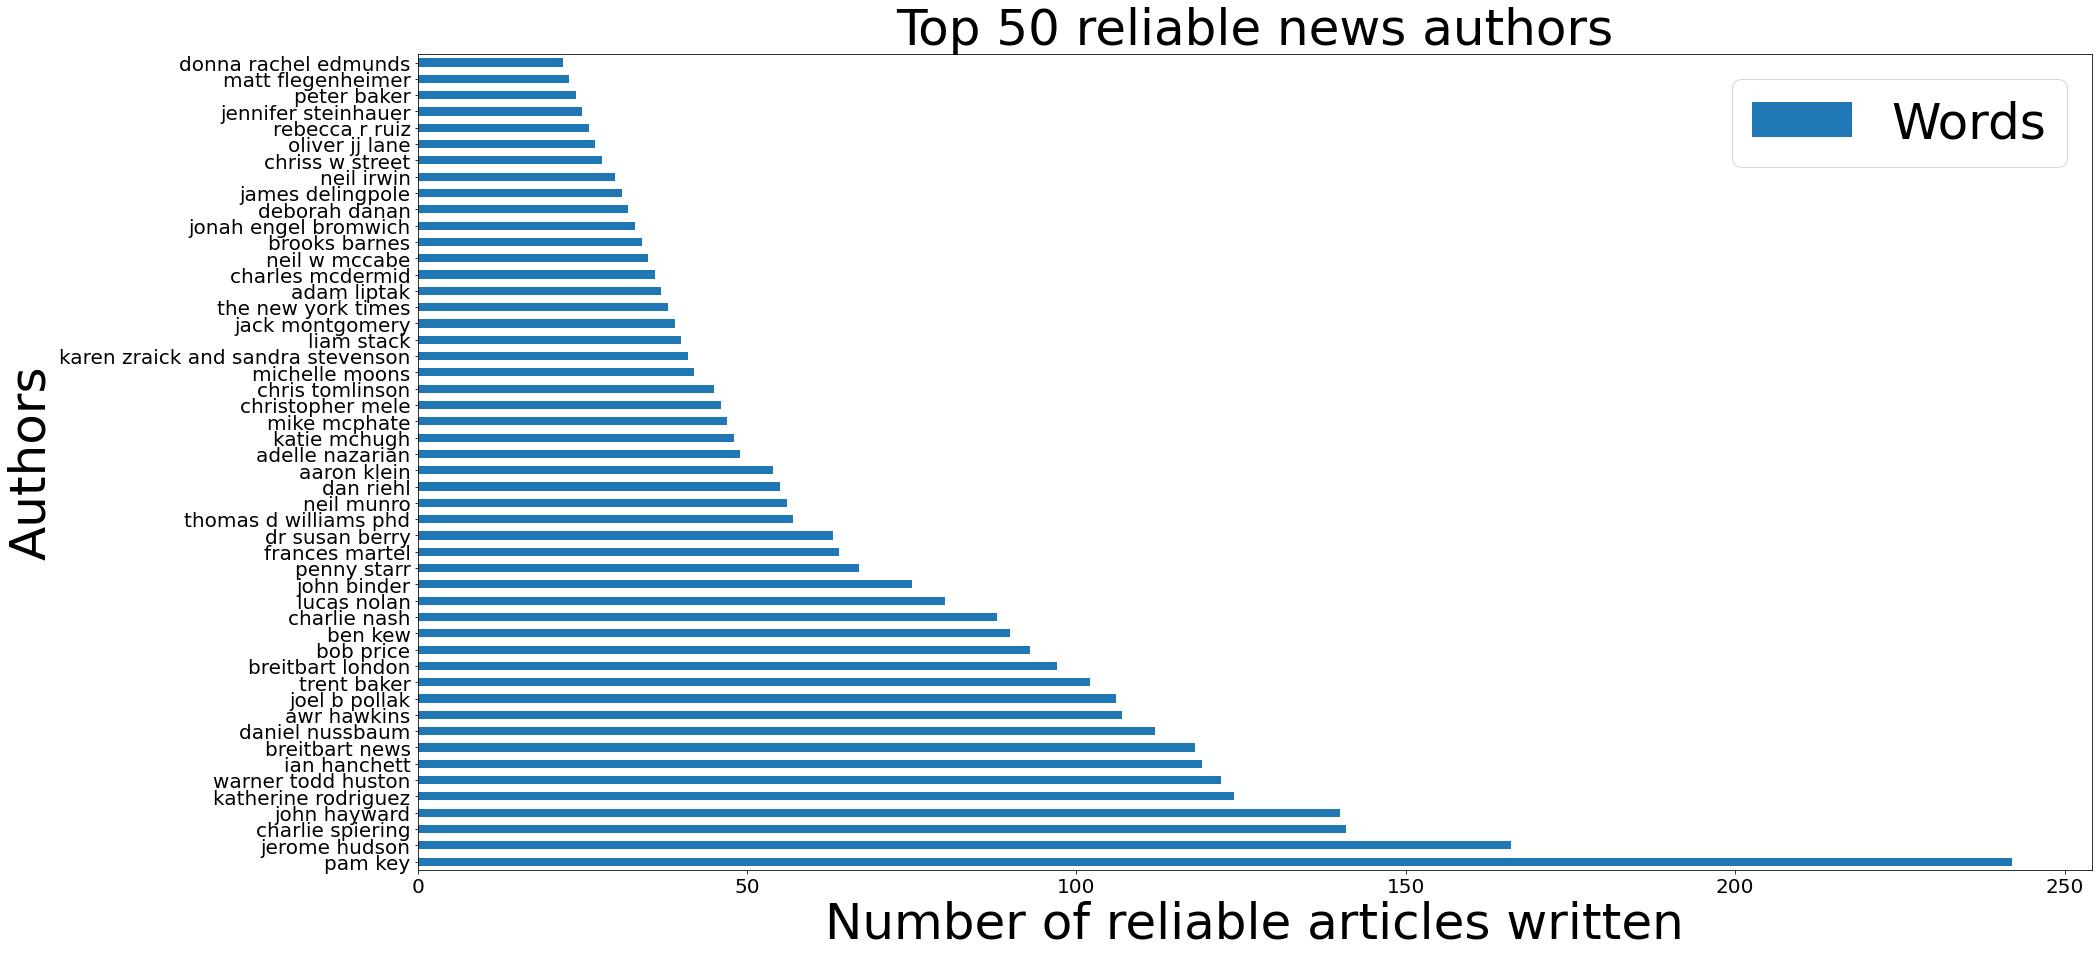

In [13]:
create_visualization_of_top_words(unique_reliable_authors,"author",common=False,reliable=True)

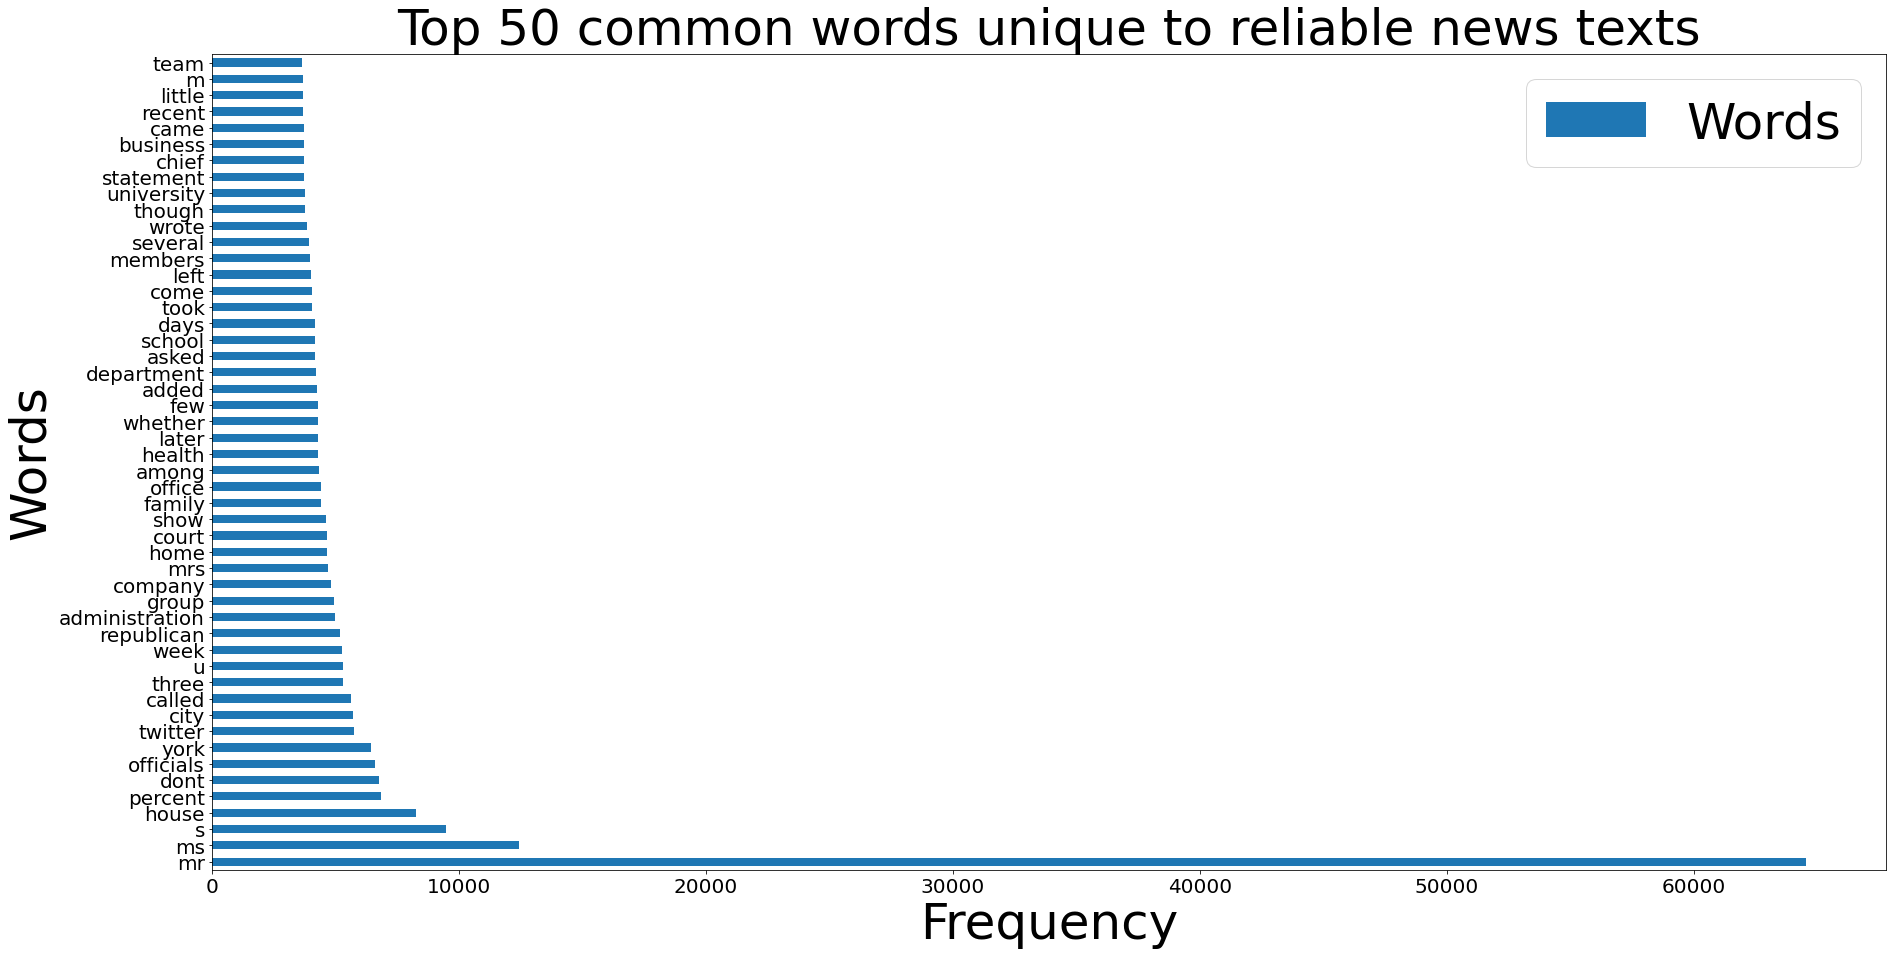

In [14]:
create_visualization_of_top_words(unique_reliable_words,"text",common=False,reliable=True)

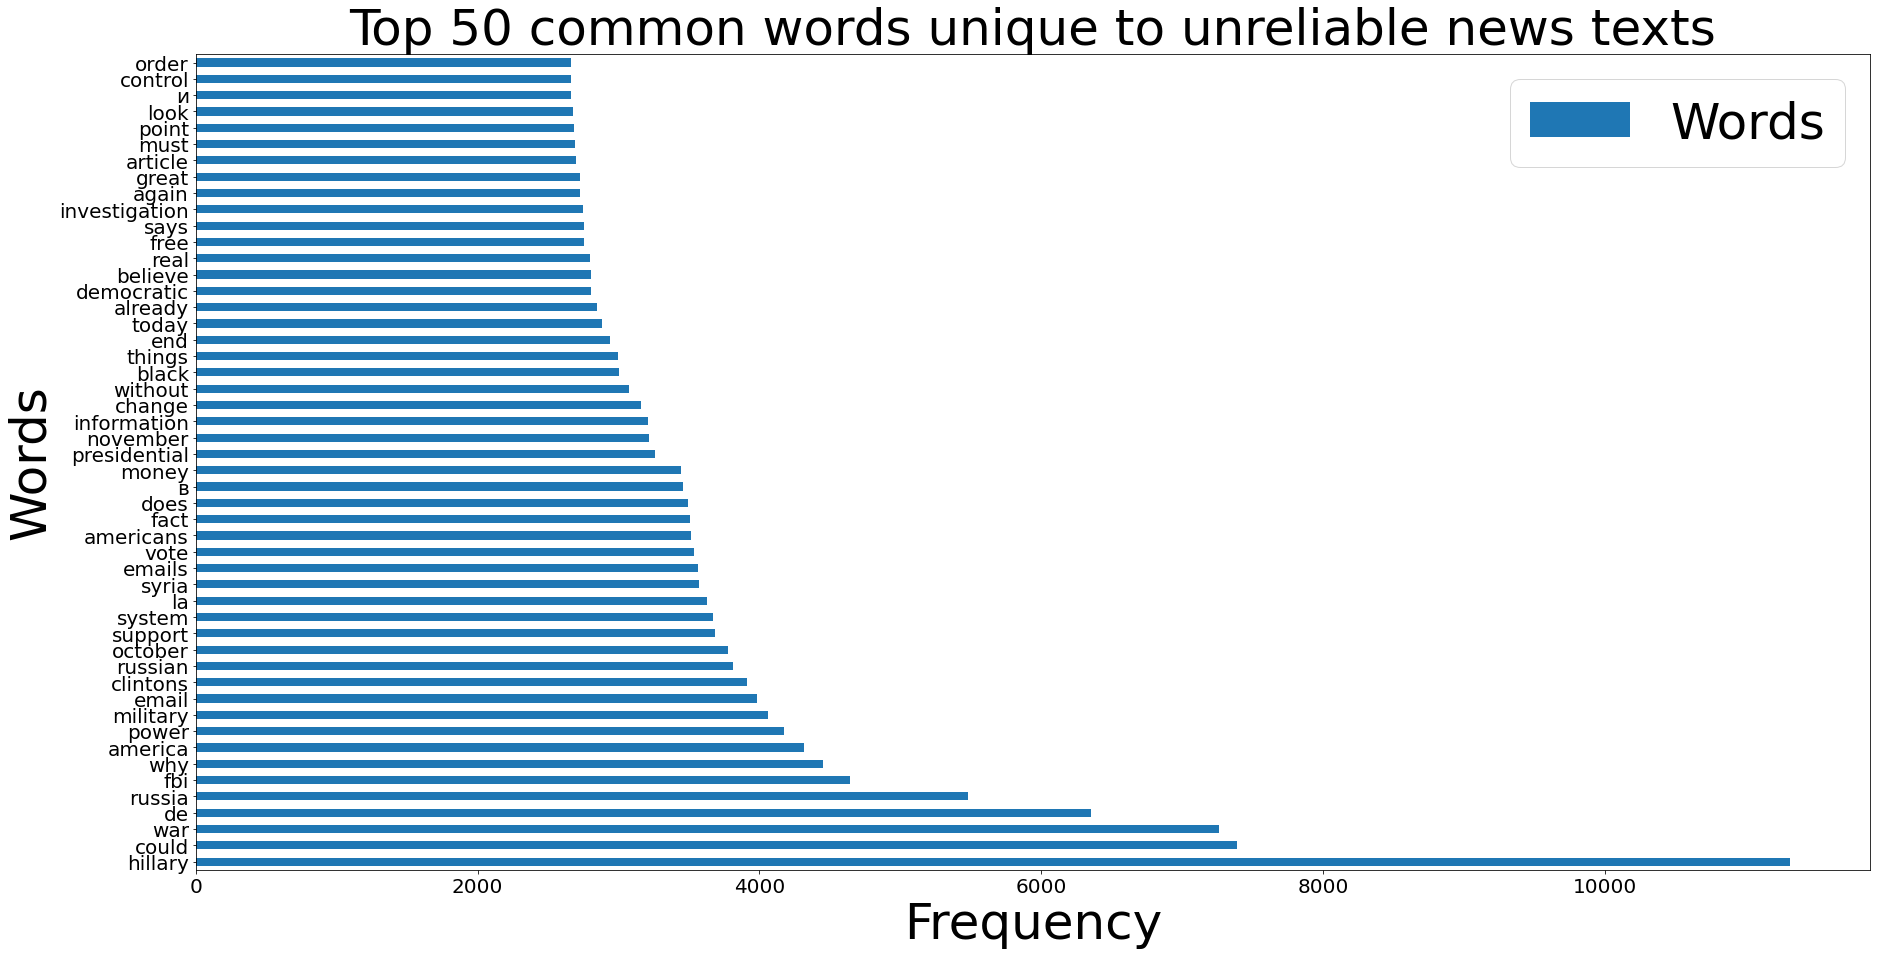

In [15]:
create_visualization_of_top_words(unique_unreliable_words,"text",common=False,reliable=False)

**Naive Bayes Implementation**

In [16]:
def probability_author_wrote_reliable_or_unreliable_article(testing_author,training_reliable_authors,training_unreliable_authors):
    testing_author=testing_author[0]
    if testing_author not in training_reliable_authors and testing_author in training_unreliable_authors:
        return 0,1
    if testing_author in training_reliable_authors and testing_author not in training_unreliable_authors:
        return 1,0
    try:
        reliable_probability=training_reliable_authors[testing_author]/(training_reliable_authors[testing_author]+training_unreliable_authors[testing_author])
        unreliable_probability=1-reliable_probability #complement rule
        return reliable_probability,unreliable_probability
    except:
        return .5,.5
        #Author has 50/50 chance of being reliable because they have no record of writing an article in the training set.
        
def probablilty_text_is_reliable_and_unreliable(testing_text,training_top_k_unique_reliable_words,training_top_k_unique_unreliable_words):
    reliable_word_count=len([word for word in testing_text if word in training_top_k_unique_reliable_words])
    unreliable_word_count=len([word for word in testing_text if word in training_top_k_unique_unreliable_words])
    
    try:
        reliable_probability=reliable_word_count/(unreliable_word_count+reliable_word_count)
        unreliable_probability=1-reliable_probability
        return reliable_probability,unreliable_probability
    except:
        return .5,.5
    
def probablilty_title_is_reliable_and_reliable(testing_title,training_top_k_unique_reliable_titles,training_top_k_unique_unreliable_titles):
    reliable_word_count=len([word for word in testing_title if word in training_top_k_unique_reliable_titles])
    unreliable_word_count=len([word for word in testing_title if word in training_top_k_unique_unreliable_titles])
    try:
        reliable_probability=reliable_word_count/(unreliable_word_count+reliable_word_count)
        unreliable_probability=1-reliable_probability
        return reliable_probability,unreliable_probability
    except:
        return .5,.5

def Naive_Bayes_prediction(testing_title,testing_author,testing_text,training_reliable_text,training_reliable_titles,training_reliable_authors,training_unreliable_text,training_unreliable_titles,training_unreliable_authors):
    
    reliable_title_probability,unreliable_title_probability=probablilty_title_is_reliable_and_reliable(testing_title,training_reliable_titles,training_unreliable_titles)
    
    reliable_text_probability,unreliable_text_probability= probablilty_text_is_reliable_and_unreliable(testing_text,training_reliable_text,training_unreliable_text)
    
    reliable_author_probability,unreliable_author_probability=probability_author_wrote_reliable_or_unreliable_article(testing_author,training_reliable_authors,training_unreliable_authors)
    
    reliable_probability=reliable_title_probability*reliable_text_probability*reliable_author_probability
    
    unreliable_probability= unreliable_title_probability*unreliable_text_probability*unreliable_author_probability
    
    if reliable_probability>unreliable_probability:
        return 0
    if reliable_probability<unreliable_probability:
        return 1
    if reliable_probability==unreliable_probability:
        return [0,1][math.floor(random.random()*2)]


In [17]:
testing_set["text"]=list(map(text_cleaning,testing_set["text"]))
testing_set["title"] = testing_set["title"].replace(np.nan, "no_title")
testing_set["title"]=list(map(text_cleaning,testing_set["title"]))
testing_set["author"] = testing_set["author"].replace(np.nan, "no_author")
testing_set["author"]=list(map(author_cleaning,testing_set["author"]))

In [18]:
true_labels = testing_set["label"]
pred_labels = []
for i in range(len(testing_set)):
    testing_title,testing_author,testing_text=testing_set["title"][i],testing_set["author"][i],testing_set["text"][i]
    pred_labels.append(Naive_Bayes_prediction(testing_title,testing_author,testing_text,unique_reliable_words,unique_reliable_titles,unique_reliable_authors,unique_unreliable_words,unique_unreliable_titles,unique_unreliable_authors))




print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))

              precision    recall  f1-score   support

           0       0.56      0.71      0.62      2339
           1       0.69      0.54      0.61      2861

    accuracy                           0.62      5200
   macro avg       0.63      0.62      0.62      5200
weighted avg       0.63      0.62      0.61      5200

[[1656  683]
 [1316 1545]]
